# Assignment 2 - Machine Learning Basics

## NATHAN WARREN
Netid:  naw32

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
- Understand the bias-variance tradeoff and the impact of model flexibility algorithm performance and model selections

In [15]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
%config InlineBackend.figure_format = 'retina'

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

**1.**
Better, a data set with a large $n$ generally has less variance than that of a data set with a small $n$ since the formula for variance divides by $n$. Since the sample size is large, having a flexible method is less likely to overfit the model to the data (bias is low with high $p$). A flexible method will allow for better fitting of the data unless the data is truly linear in which case we would not want to use a flexible method. 

**2.**
Worse. Generally, data with a small $n$ will have a higher variance. In addition, by using a flexible model, the low amount of observations is more likely to lead to overfitting, which would lead to a higher test error.

**3.**
Better, a non-flexible learning method would fit a linear relationship better while a flexible method would fit a non-linear relationship better. More degrees of freedom means the flexible method would fit better.

**4.**
Wrose, increasing the flexibility would lead to increasing the variance. If the error terms already have a high variance, we would want to avoid increasing the variance. Increasing flexibility would likely lead to an increase of fitting on error terms.


## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

**(a)**

i) Regression as we are interested in the actual salary amount and how it changes with different predictors.

ii) Inference since we are interested in understanding what factors affect CEO salary.

iii) $n$ = 500, $p$ = 3

**(b)**

i) Classification since we are interested in sucess or failure (binary classification).

ii) Prediction becaues we want to predict whether our project will be a sucess or failure.

iii) $n$ = 20, $p$ = 13


**(c)**

i) Regression as we are interested in the actual percentage change which is continuous.

ii) Prediction as we are interested in perecntage change in the dollar based on the current week.

iii) $n$ = 52, $p$ = 3

# Practical Questions

## 3
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

**ANSWER**:

In [16]:
import numpy as np
from numpy import linalg as LA
import pandas as pd

# (a) Compute the Euclidean distance between each observation and the test point,  𝑥1=𝑥2=𝑥3=0 . 
# Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.
X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

# Calculating Euclidean distance
ED = []
for i in range(len(X)):
    dist = np.linalg.norm(X[i] - 0)
    ED.append(dist)

# Making table (df)
df = pd.DataFrame(columns = ['x1', 'x2', 'x3'], data = X, index = range(1,7))
df['y'] = y
df['Euclidean Distance'] = ED

# Table Output
df

,x1,x2,x3,y,Euclidean Distance
1,0,3,0,r,3.000000
2,2,0,0,r,2.000000
3,0,1,3,r,3.162278
4,0,1,2,b,2.236068
5,-1,0,1,b,1.414214
6,1,1,1,r,1.732051


**(b)** 

This would predict blue. When 𝐾=1, the closest point is observation 5, which is blue as it has the smallest euclidean distance of 1.41. 

**(c)** 

This would predict red. When 𝐾=3, the closest points are observations 5, 6, and 2. Observation 6 and 2 are red while observation 5 is blue. Since the majority, being $\frac{2}{3}$ of the nearest neighbors are red, we would predict red.

**(d)**

A larger 𝐾 means a smoother boundry. We would expect the best value of 𝐾 to be small since the data is non-linear. Having a lower 𝐾 provides more flexibility which is better for non-linear models.

## 4
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [37]:
from numpy import linalg as LA
import scipy as sp
# (a) Write your own kNN classifier

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.x = None
        self.y = None
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x.values
        self.y = y.values

    def predict(self, x_test, k):
        # List to store predictions
        y_hat = [] 

        # Iterate through test set
        for row in x_test:
            # Euclidean distance
            dist = np.sqrt(np.sum((row - self.x)**2, axis = 1))
            
            # Sort by k and id idx
            dist_ind = np.argsort(dist)[0:k]
            
            # match idx with y
            y_ind = self.y[dist_ind]
            
            # Find most common classification
            class_mode = stats.mode(y_ind)
            
            # Add to prediction list
            y_hat.append(class_mode[0].tolist())
            
        # Flatten list
        y_hat = [result for classes in y_hat for result in classes]
        
        # return predictions
        return y_hat

# Accuracy to evaluate performance
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [38]:
#(b)
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#  and time the predictions of each
import pandas as pd

#HIGH
x_test_high = pd.read_csv("/Users/N1/Desktop/705 - ML/ids705/assignments/data/A2_X_test_high.csv", header = None)
y_test_high = pd.read_csv("/Users/N1/Desktop/705 - ML/ids705/assignments/data/A2_Y_test_high.csv", header = None)
x_train_high = pd.read_csv("/Users/N1/Desktop/705 - ML/ids705/assignments/data/A2_X_train_high.csv", header = None)
y_train_high = pd.read_csv("/Users/N1/Desktop/705 - ML/ids705/assignments/data/A2_Y_train_high.csv", header = None)

#LOW
x_test_low = pd.read_csv("/Users/N1/Desktop/705 - ML/ids705/assignments/data/A2_X_test_low.csv", header = None)
y_test_low = pd.read_csv("/Users/N1/Desktop/705 - ML/ids705/assignments/data/A2_Y_test_low.csv", header = None)
x_train_low = pd.read_csv("/Users/N1/Desktop/705 - ML/ids705/assignments/data/A2_X_train_low.csv", header = None)
y_train_low = pd.read_csv("/Users/N1/Desktop/705 - ML/ids705/assignments/data/A2_Y_train_low.csv", header = None)

In [70]:
#(c)
from scipy import stats
import time

# Low 
k = 5
low_knn = Knn()
low_knn.fit(x_train_low, y_train_low)

# ravel
low_y = y_test_low[0].values.ravel()

# Time it
t0 = time.time()
low_pred = low_knn.predict(x_test_low.values, k)

t1= time.time()
low_time = t1-t0

# Accuracy
acc_low = accuracy(y_test_low.values, low_pred)
print(f' It takes {low_time:.4f} seconds to make a prediction for the low dimensional dataset.')
print(f' The KNN classifier has an accuracy of {(acc_low*100)}% for the low dimensional dataset.')

# High
k = 5
low_knn = Knn()
low_knn.fit(x_train_high, y_train_high)

# ravel
high_y = y_test_high[0].values.ravel()

# Time it
t2 = time.time()
high_pred = low_knn.predict(x_test_high.values, k)

t3= time.time()
high_time = t3-t2

acc_high = accuracy(y_test_high.values, high_pred)
print(f'\n It takes {high_time:.4f} seconds to make a prediction for the high dimensional dataset.')
print(f' The KNN classifier has an accuracy of {(acc_high*100)}% for the low dimensional dataset.')

 It takes 0.1960 seconds to make a prediction for the low dimensional dataset.
 The KNN classifier has an accuracy of [92.5]% for the low dimensional dataset.

 It takes 0.3598 seconds to make a prediction for the high dimensional dataset.
 The KNN classifier has an accuracy of [99.3]% for the low dimensional dataset.


**(d)**

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Init object
clf = KNeighborsClassifier(n_neighbors = 5)

# fit
clf.fit(x_train_low.values, y_train_low.values.ravel())

# Time predict
t4 = time.time()
y_pred_low = clf.predict(x_test_low.values)
t5 = time.time()
time_low = t5-t4

# Accuracy for low
acc_low = accuracy_score(y_test_low, y_pred_low)

print(f'It takes {time_low:.4f} seconds to make a prediction for the high dimensional dataset.')
print(f' The KNN classifier has an accuracy of {(acc_low*100)}% for the low dimensional dataset.')
print(f'Sklearn KNN is {low_time/time_low:.3f} faster than my KNN built from scratch.')

# fit
clf.fit(x_train_high.values, y_train_high.values.ravel())

# Time predict
t6 = time.time()
y_pred_high = clf.predict(x_test_high.values)
t7 = time.time()
time_high = t7-t6

# Accuracy for low
acc_high = accuracy_score(y_test_high, y_pred_high)

print(f'\nIt takes {time_high:.4f} seconds to make a prediction for the high dimensional dataset.')
print(f' The KNN classifier has an accuracy of {(acc_high*100)}% for the low dimensional dataset.')
print(f'Sklearn KNN is {high_time/time_high:.3f} faster than my KNN built from scratch.')

It takes 0.0264 seconds to make a prediction for the high dimensional dataset.
 The KNN classifier has an accuracy of 92.5% for the low dimensional dataset.
Sklearn KNN is 7.436 faster than my KNN built from scratch.

It takes 0.1599 seconds to make a prediction for the high dimensional dataset.
 The KNN classifier has an accuracy of 99.3% for the low dimensional dataset.
Sklearn KNN is 2.251 faster than my KNN built from scratch.


**(e)** 

Sometimes data is needed at an instant. For example, predictions for the stock market for high frequency traders generally have to be extremly quick. In these kind of situations, unsupervised machine learning algorithms that are slow may not be of benefit. 

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

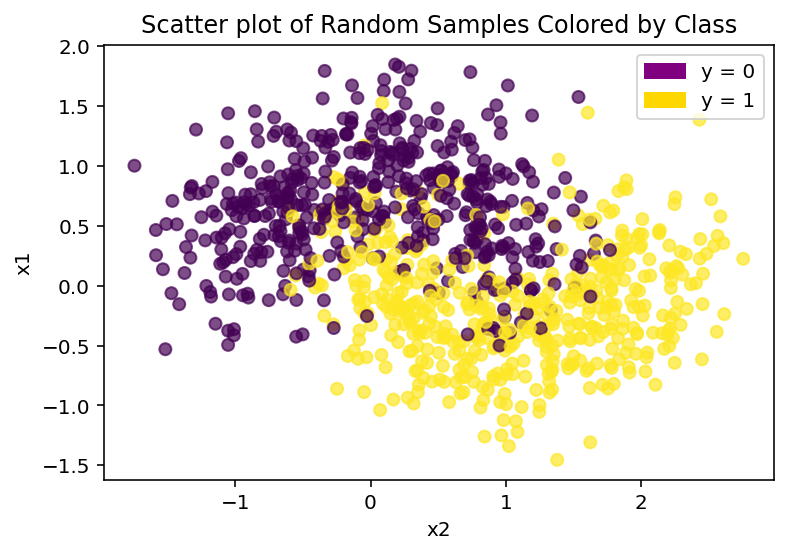

In [76]:
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


# (a) Synthetic dataset using make_moons (n= 1000)
x, y = make_moons(n_samples=1000, shuffle=True, noise=0.35, random_state=None)

# (b) Scatterplot
df = pd.DataFrame(columns = ['x1','x2'], data = x)
df['y'] = y
plt.title("Scatter plot of Random Samples Colored by Class")
plt.xlabel("x2")
plt.ylabel("x1")
sns.color_palette()
purple = mpatches.Patch(color='purple', label='y = 0') 
yellow = mpatches.Patch(color='gold', label='y = 1') 
plt.legend(handles=[purple,yellow], loc = 'upper right')
plt.scatter(y='x2', x ='x1', data = df, c= 'y', alpha = .7)

plt.show()

In [78]:
import seaborn as sns
# (c) Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets,
# fit three k-Nearest Neighbor classifiers with:  𝑘={1,25,50} . This will result in 9 combinations (3 datasets, with 3 trained classifiers).
import warnings 
import pandas as pd
warnings.simplefilter('ignore')

# 3 data subsets
df1 = df.sample(100)
df2 = df.sample(100)
df3 = df.sample(100)
dfn=[df1, df2, df3]

# Getting just the values as arrays
d1x = df1[['x1', 'x2']].values
d1y = df1[['y']].values
d2x = df2[['x1', 'x2']].values
d2y = df2[['y']].values
d3x = df3[['x1', 'x2']].values
d3y = df3[['y']].values


# 3 KNN
from sklearn.neighbors import KNeighborsClassifier as KNN

# List and dictionary for fitting
k1 = [1, 25, 50]
dx = [d1x, d2x, d3x]
dy = [d1y, d2y, d3y]
dn = zip(dx,dy)

# Fit 9 models 

# List to store models 
knn_mod = []

# Fit models
for k,v in dn:
    for i in k1:
            knn = KNN(n_neighbors=i)
            knn_mod.append(knn.fit(k, v))

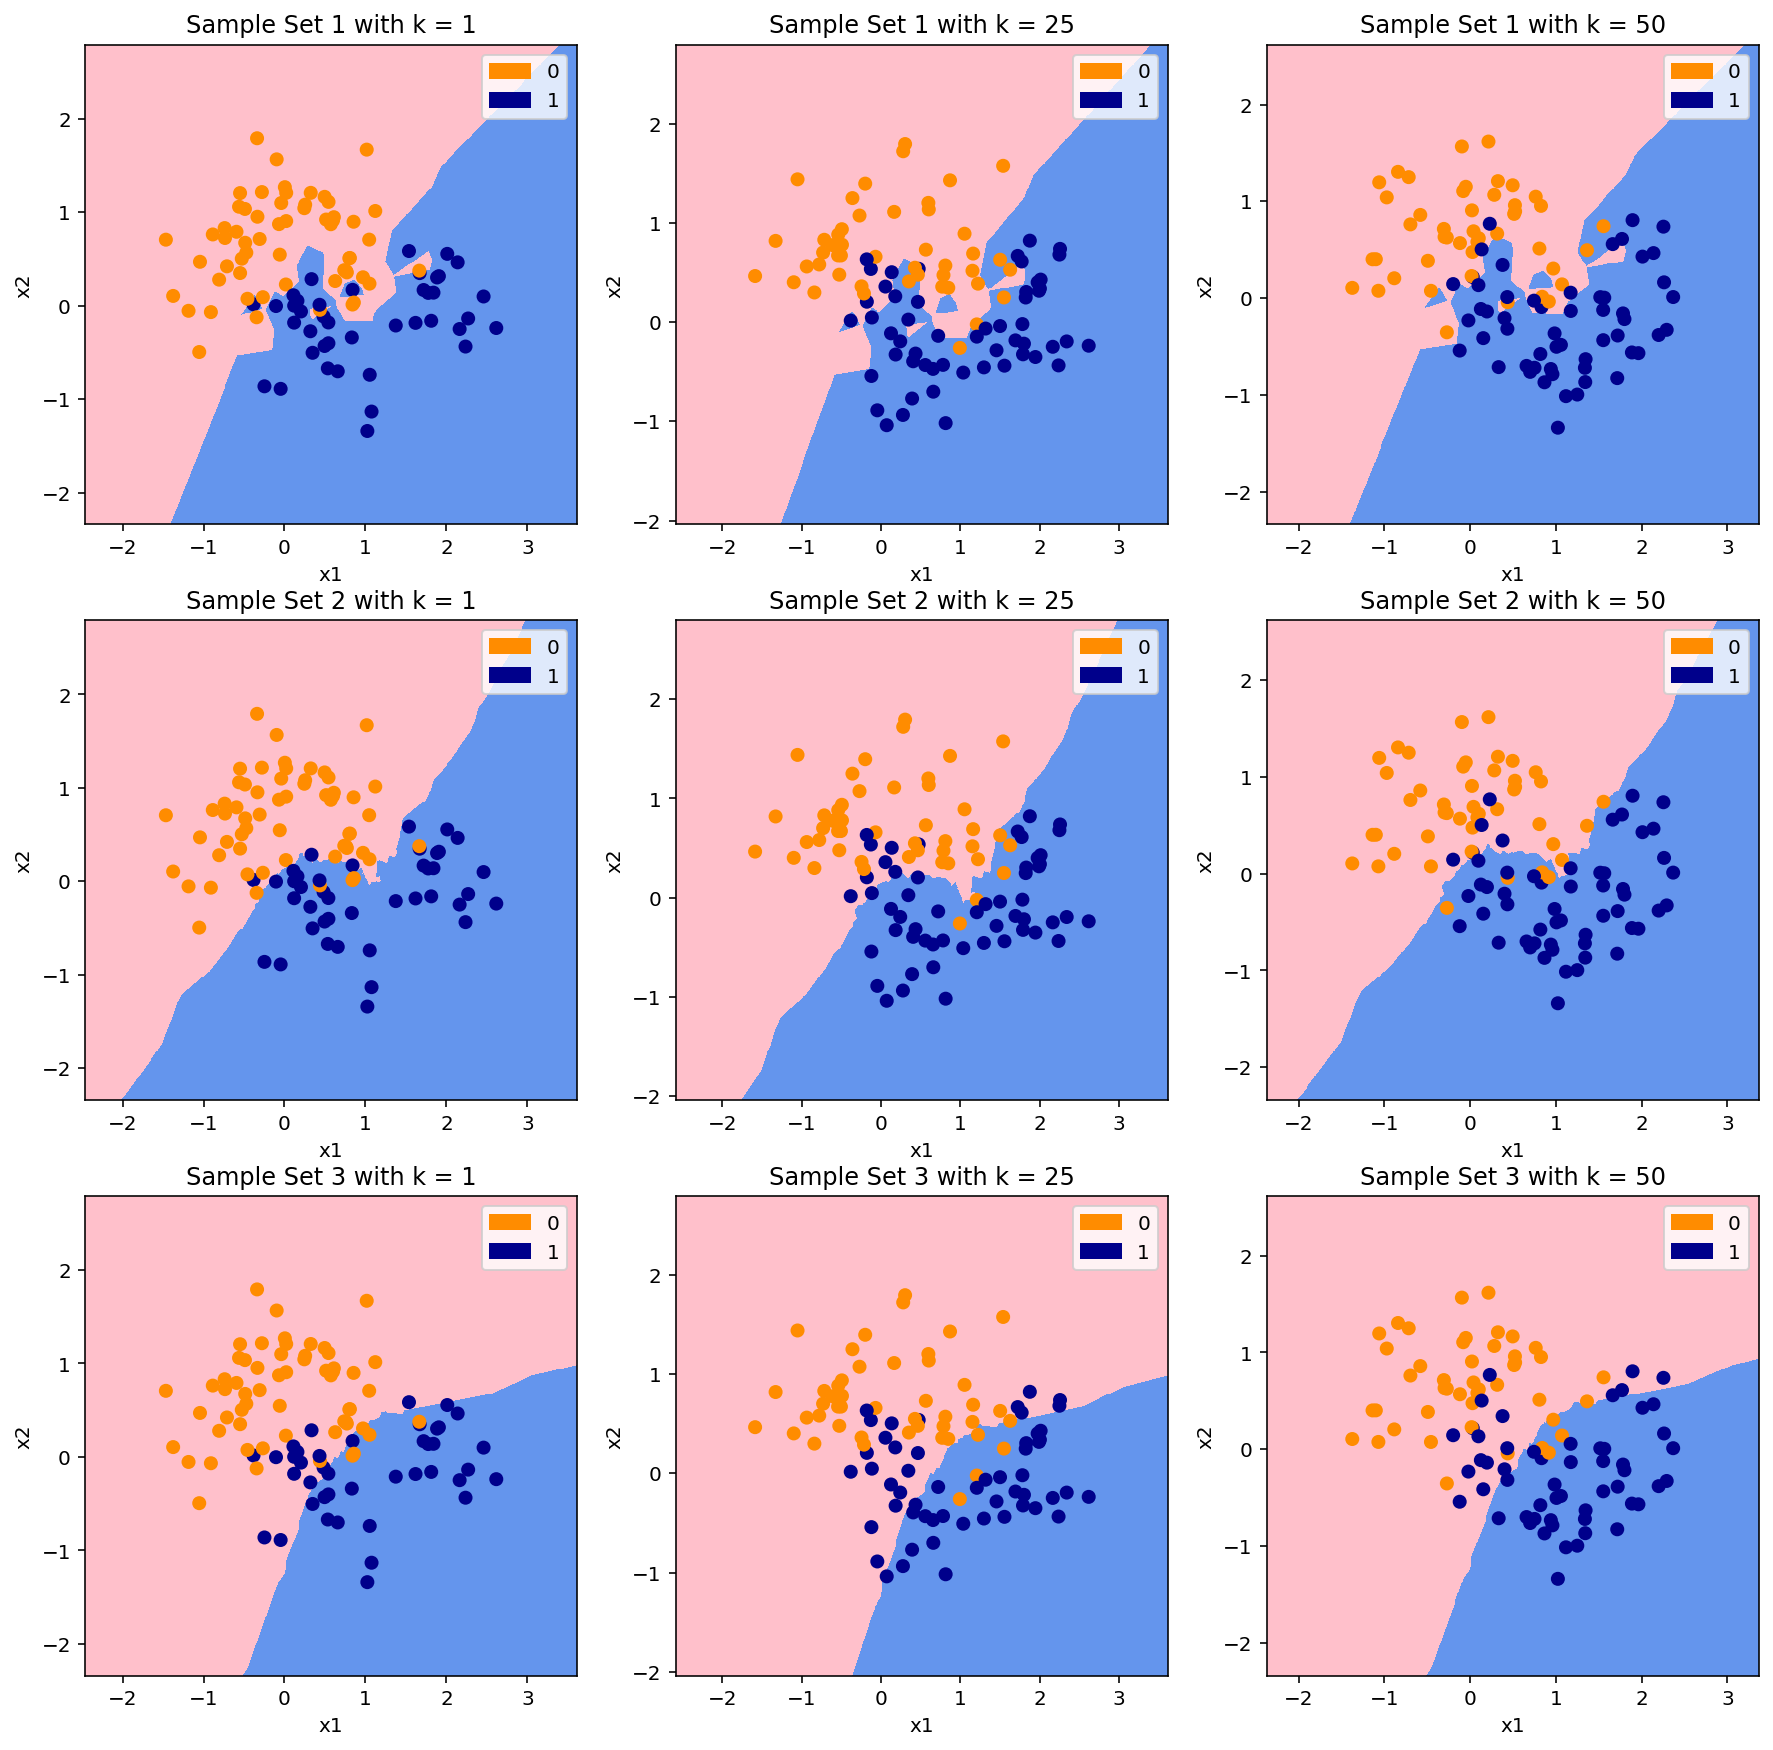

In [109]:
# (d) 
# I was unable to plot this correctly
# plot the decision boundary
# column =  𝑘  
# row = df
# Used https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html as reference for making this
# I was unable to complete this properly

import matplotlib.pyplot as plt
import numpy as np

# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(('pink', 'cornflowerblue'))
cmap_bold = ListedColormap(['darkorange', 'darkblue'])
# color for legend
orange = mpatches.Patch(color='darkorange', label= '0')
blue = mpatches.Patch(color='darkblue', label= '1')

numRows, numCols = 3,3
nvalues = 500
# To make all nine plots
fig, ax = plt.subplots(numRows, numCols, figsize = (15,15))
for i in range(numRows):
    for z in range(numCols):
        dfn_x1 = dfn[z]['x1']
        dfn_x2 = dfn[z]['x2']
        dfn_y = dfn[z]['y']
    
        # Meshgrid
        x1 = np.linspace(dfn_x1.min() - 1, dfn_x1.max() + 1, nvalues)
        x2 = np.linspace(dfn_x2.min() - 1, dfn_x2.max() + 1, nvalues)
        xx, yy = np.meshgrid(x1, x2)

        pred = knn_mod[i].predict(np.c_[xx.ravel(), yy.ravel()])
        pred = pred.reshape(xx.shape)

        # Plot 
        ax[i,z].pcolormesh(xx, yy, pred, cmap = cmap_light)
        ax[i,z].scatter(dfn_x1, dfn_x2, c = dfn_y, cmap = cmap_bold)
        ax[i,z].set_title(f'Sample Set {i+1} with k = {k1[z]}')
        ax[i,z].set_xlabel('x1')
        ax[i,z].set_ylabel('x2')
        ax[i,z].legend(loc = 'upper right', handles = [orange, blue])


**(e)**

As k increases in value the boundry becomes smoother and thus less flexible.I was unable to get this working but in a high low k such as 1 would mean there would be a lot of flexibility and a high k of 50 would mean there isnt much at all. Based on what I've seen, at K=1, you get islands of classified areas. A k of 25 would likely provides the best bias-variance tradeoff as k =1 is too flexible and k = 50 is not flexible enough. 

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.
Unable to but here is my explanation. There is a tradeoff between bias and variance. As flexibility increases, (decreasing value of k), high variance occurs. When flexibility is low (higher values of k), bias increases. In between these two is where bias and variance are both lowest. It is this k we want to use in our model as it lowers the total test error. 


## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

<function matplotlib.pyplot.show(*args, **kw)>

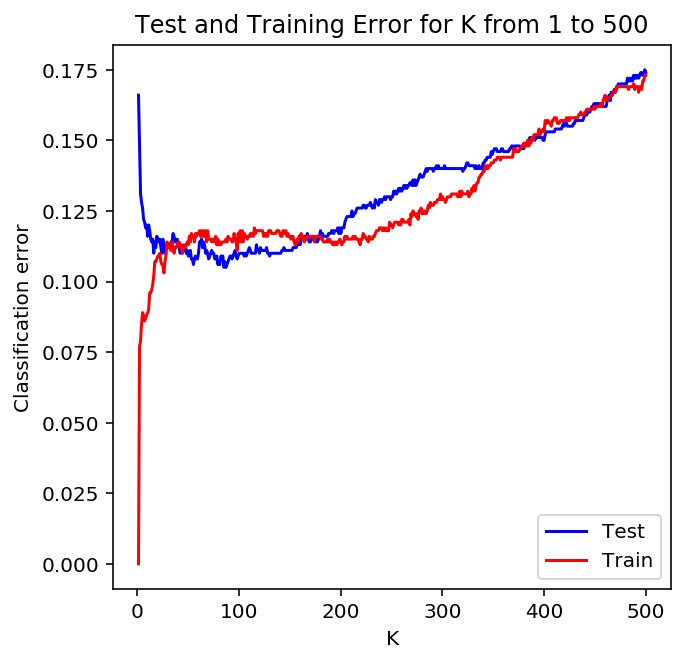

In [494]:
from sklearn.neighbors import KNeighborsClassifier 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# (a) 
# Previous train set
traindf = df
x = x_train
y = y_train

# Test set
x_test, y_test = make_moons(n_samples=1000, shuffle=True, noise=0.35, random_state=None)
testdf = pd.DataFrame({'x1':x_test[:,0],'x2':x_test[:,1],'y':y_test})


# (b) Train knn classifier on training set for k = [1:500]
# For storing error values in the loop
test_error =[]
train_error =[]


# Loop to predict train and test 
# Train a kNN classifier and apply to training and test dataset

for k in range(1,501):
    #Create KNN 
    knn = KNeighborsClassifier(n_neighbors = k)
    #Knn fit
    knn_train_fit = knn.fit(x_train, y_train)
    #Knn predict with test and train
    knn_train_pred = knn.predict(x_train)
    knn_test_pred = knn.predict(x_test)
    
    #Error (1- to get proportion)
    tr_err = 1- accuracy_score(y_train, knn_train_pred)
    te_err = 1- accuracy_score(y_test, knn_test_pred)
    train_error.append(tr_err)
    test_error.append(te_err)

#Plot it
plt.figure(figsize=(5,5))
plt.plot(range(1,501), test_error, label='Test', color="blue")
plt.plot(range(1,501), train_error, label='Train', color="red")
plt.title("Test and Training Error for K from 1 to 500")
plt.xlabel("K")
plt.ylabel("Classification error")
plt.legend(loc='lower right')
plt.show()

**(c)** What trend do you see in the results?


As 𝑘 increases from 0, the train and test error rate converge. Train error is higher than test error from about 𝑘 = 10 to about 𝑘=175. Test error is higher between approximately 𝑘 = 200 to K = 300. Train error is again higher than test error for the reamining values of 𝑘 up to 500. The training error shows an increasing trends with increase in 𝑘 value, although it does appear to be slightly parabolic.  The trends is seen on the test error line as well. 

**(d)** What values of  𝑘 represent high bias and which represent high variance?


High values of 𝑘, where flexibility is low,  represent high bias, but low variance. Low values of k, where flexibility is high, represent high variance, but low bias. 

In [341]:
#(e) Find min k
df_error=pd.DataFrame({'Test_error':test_error, 'Train_error':train_error})
df_error[df_error['Test_error'] == df_error['Test_error'].min()]


,Test_error,Train_error
20,0.107,0.109
24,0.107,0.106


**(e)** 


The optimal value of 𝑘 is 20 or 24, where 𝑘 minimizes the test error. At this value, bias and variance are optimally balanced. It is likely that one of these is better than the other but has been rounded in python.


**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?


In linear regression, flexibility is controlled by the number of degrees of freedom. The higher the degrees of freedom, the more flexible the model is. Degrees of freedom are added when adding in additional variables or taking the model to a higher order.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given training and testing data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

**ANSWER**

(a)


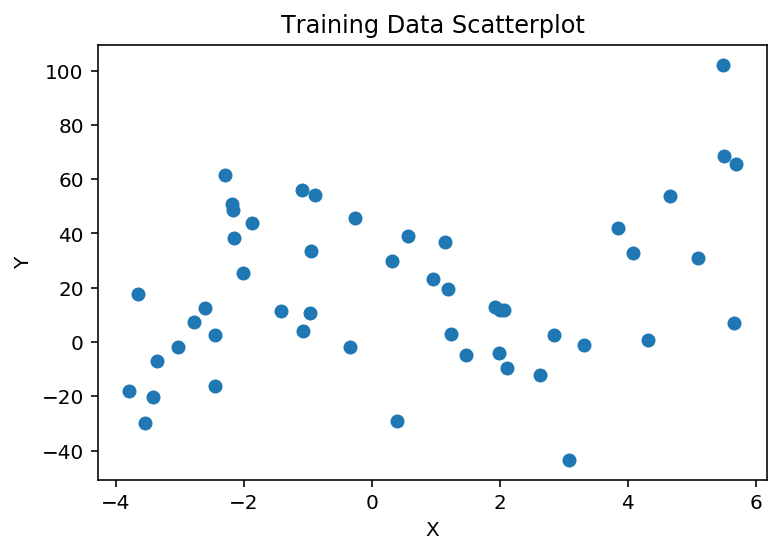

In [487]:
#(a)
# Scatter of training data
import pandas as pd
LR_test = pd.read_csv("/Users/N1/Desktop/705 - ML/ids705/assignments/data/A2_Q7_test.csv")
LR_train = pd.read_csv("/Users/N1/Desktop/705 - ML/ids705/assignments/data/A2_Q7_train.csv")

plt.scatter(LR_train['x'], LR_train['y']);
plt.xlabel('X')
plt.ylabel ("Y")
plt.title("Training Data Scatterplot")
print('(a)')
plt.show()

(b) Estimate a linear regression model ( 𝑦=𝑎0+𝑎1𝑥 ) for the training data and calculate both the  𝑅2  value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g.  𝑦=𝑎0+𝑎1𝑥 , but with the estimated coefficients inserted.

In [493]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#(b)
# Warning to reshape when trying to put the columns in the model
trainX = LR_train['x'].values
trainY = LR_train['y'].values
trainX = trainX.reshape(-1,1)

# lin reg 
fit = LinearRegression()
fit.fit(trainX, trainY)
pred_y = fit.predict(trainX)

#Intercept
icpt = fit.intercept_
#Coefficients
coef = fit.coef_

#MSE
mse = (mean_squared_error(pred_y, trainY))
#R2
R2 = r2_score(trainY, pred_y)
print('(b)')
print(f'The linear model, estimated by the training data, has the following equation:  y = {icpt:.2f} + {coef[0]:.2f}x')
print(f"The Mean Square Error of this model is {mse:.3f}")
print(f'The R-squared value is {R2:.3f}')

(b)
The linear model, estimated by the training data, has the following equation:  y = 17.20 + 2.59x
The Mean Square Error of this model is 791.417
The R-squared value is 0.065


In [489]:
#(c)
#Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be  𝑥1=𝑥  and  𝑥2=𝑙𝑜𝑔(𝑥) , 
#your model would be of the form  𝑦=𝑎0+𝑎1𝑥+𝑎2𝑙𝑜𝑔(𝑥) . Also provide the  𝑅2  and mean square error of the fit for the training data.



#Look at square and cube
X_TRAIN = pd.DataFrame()
X_TRAIN1 = LR_train['x'].values
X_TRAIN2 = LR_train['x'].values **2
X_TRAIN3 = LR_train['x'].values **3
#Reshape
X_TRAIN1.reshape(-1,1)
X_TRAIN2.reshape(-1,1)
X_TRAIN3.reshape(-1,1)
#in one df
X_TRAIN['x'] = X_TRAIN1
X_TRAIN['x2'] = X_TRAIN2
X_TRAIN['x3'] = X_TRAIN3

# lin reg 
fit2 = LinearRegression()
fit2.fit(X_TRAIN, trainY)
pred_y2 = fit2.predict(X_TRAIN)

#Intercept
icpt2 = fit2.intercept_
#Coefficients
coef1, coef2, coef3 = fit2.coef_

#MSE
mse2 = (mean_squared_error(pred_y2, trainY))
#R2
R2_2 = r2_score(trainY, pred_y2)
print('(c)')
print(f'The linear model, estimated by the training data, has the following equation:  y = {icpt2:.2f} + {coef1:.2f}x + {coef2:.2f}x^2 + {coef3:.2f}x^3.')
print(f"The Mean Square Error of this model is {mse2:.3f}.")
print(f'The R-squared value is {R2_2:.3f}.')

(c)
The linear model, estimated by the training data, has the following equation:  y = 24.16 + -9.25x + -2.13x^2 + 0.90x^3.
The Mean Square Error of this model is 510.885.
The R-squared value is 0.396.


(d)


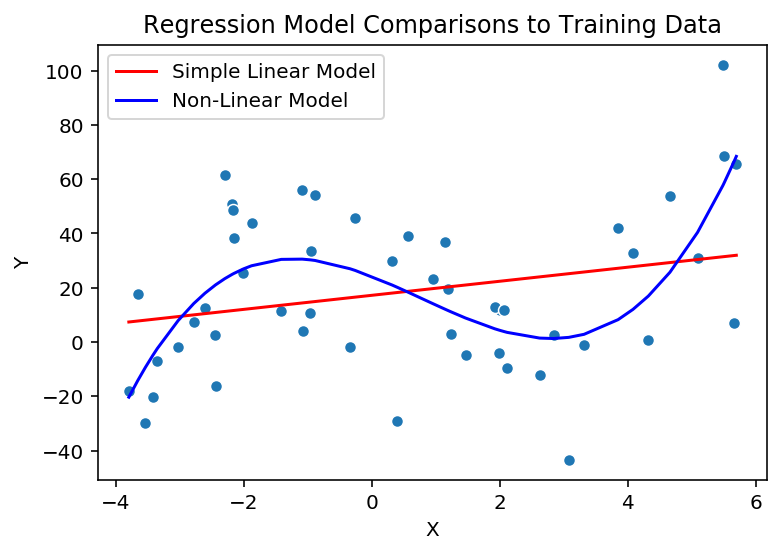

In [491]:
# (d) Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).
# Linear and Non-linear model on same scatter plot
sns.scatterplot(LR_train['x'], LR_train['y'])
sns.lineplot(LR_train['x'], pred_y, color = 'red', label = 'Simple Linear Model')
sns.lineplot(LR_train['x'], pred_y2, color = 'blue', label = 'Non-Linear Model' )
plt.xlabel('X')
plt.ylabel ("Y")
plt.title("Regression Model Comparisons to Training Data")
print('(d)')
plt.show()

In [477]:
#(e) Using the models above, apply them to the test data and estimate the 𝑅2  and mean square error of the test dataset.

# Warning to reshape when trying to put the columns in the model
# linear
testX = LR_test['x'].values
testY = LR_test['y'].values
testX = testX.reshape(-1,1)

# lin reg 
fit3 = LinearRegression()
fit3.fit(testX, testY)
pred_y_test = fit3.predict(testX)

#Intercept
icpt = fit3.intercept_
#Coefficients
coef = fit3.coef_

#MSE
mse = (mean_squared_error(pred_y_test, testY))
#R2
R2 = r2_score(testY, pred_y_test)

print(f"(e)\n The Mean Square Error of the simple linear model is {mse:.3f}")
print(f'The R-squared value of the simple lienar model is is {R2:.3f}')


# Transformed (poly)

#Look at square and cube
X_TEST = pd.DataFrame()
X_TEST1 = LR_test['x'].values
X_TEST2 = LR_test['x'].values **2
X_TEST3 = LR_test['x'].values **3
#Reshape
X_TEST1.reshape(-1,1)
X_TEST2.reshape(-1,1)
X_TEST3.reshape(-1,1)
#in one df
X_TEST['x'] = X_TEST1
X_TEST['x2'] = X_TEST2
X_TEST['x3'] = X_TEST3

# lin reg 
fit4 = LinearRegression()
fit4.fit(X_TEST, testY)
pred_y2 = fit2.predict(X_TEST)

#Intercept
icpt = fit4.intercept_
#Coefficients
coef1, coef2, coef3 = fit4.coef_

#MSE
mse2 = (mean_squared_error(pred_y2, testY))
#R2
R2_2 = r2_score(testY, pred_y2)
print(f"\nThe Mean Square Error of the non-linear model is {mse2:.3f}.")
print(f'The R-squared value of the non-linear model is {R2_2:.3f}.')

(e)
 The Mean Square Error of the simple linear model is 969.452
The R-squared value of the simple lienar model is is 0.016

The Mean Square Error of the non-linear model is 759.503.
The R-squared value of the non-linear model is 0.229.


(f) 

The non-linear models performed better than the linear models. By looking at the R-squared value and the mean square error (MSE), we see that R-squared is higher for the polynomial model for both training and test data and the MSE is lower for both training and test data. The data was non-linear and so using a polynomial model fit the data better. By transforming our features into polynomials for the model, we increased the degrees of freedom, thereby increasing the flexibility of the model. 

g) 

If the test data was significantly different from the training data, the model would be significantly worse at making predicitons on the test data. When building models, we assume that the training data is somewhat representative of the test data and vice-versa. If this was not the case, a large amount of the predictive capability of the model would be lost. 